Ken Li - 66205186 - lik16

CSCI 4170 - Projects in ML and AI

Professor Mushtaque

January 27, 2025

I was told that wine quality was a common dataset, so this is my new data set: Student performance based on factors such as age, race, parents' educations, etc.
https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
The independent variable I will be considering is what letter grade the student got (4 corresponds to A, 3 to B, 2 to C, 1 to D, and 0 to F)

Task 1 (20 points): Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier. Additionally, do the following:

- Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.
- Do some research on what sensitivity analysis is and how it is performed (include
citations). Perform a sensitivity analysis to measure the impact of at least two input
features on your model's decision boundary.


In [52]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [58]:
df = pd.read_csv('grades.csv')

df.info()

X = df.drop(['StudentID','GPA','GradeClass'],axis = 1)
Y = df.GradeClass

#Y2 = df['GradeClass']

# print(X.columns)
print(Y)
# print(Y2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
0       2.0
1       1.0


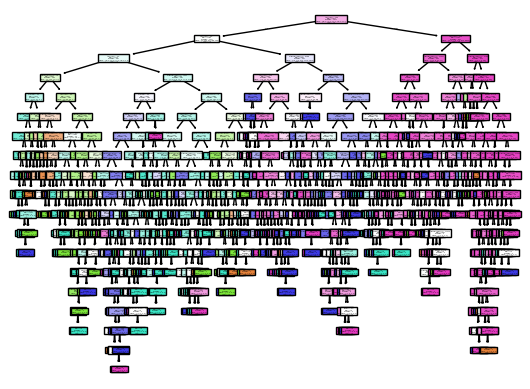

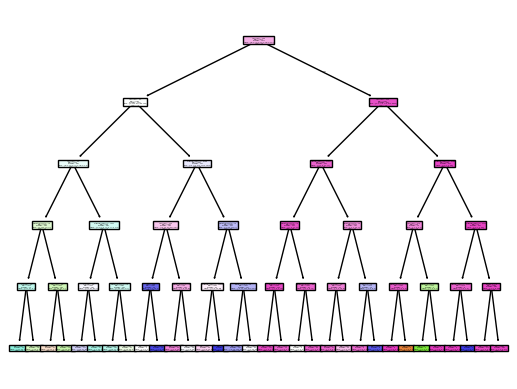

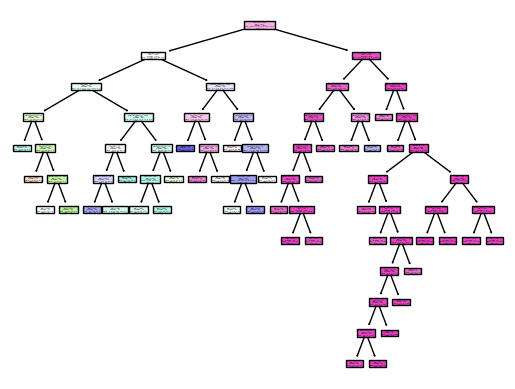

DecisionTreeClassifier(max_depth=20, min_samples_split=10)

In [55]:
#data source https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
#print("Description")
#print(df.describe())

classification_tree = tree.DecisionTreeClassifier()
classification_tree.fit(X_train,y_train)
classNames = ['0.0','1.0','2.0','3.0','4.0']
# plt.figure(figsize=(12,8))
tree.plot_tree(classification_tree, filled=True, feature_names = X.columns,class_names = classNames)
plt.show()

classification_tree = tree.DecisionTreeClassifier(max_depth = 5)
classification_tree.fit(X_train,y_train)
classNames = ['0.0','1.0','2.0','3.0','4.0']
# plt.figure(figsize=(12,8))
tree.plot_tree(classification_tree, filled=True, feature_names = X.columns,class_names = classNames)
plt.show()

classification_tree = tree.DecisionTreeClassifier(min_samples_split = 100)
classification_tree.fit(X_train,y_train)
classNames = ['0.0','1.0','2.0','3.0','4.0']
# plt.figure(figsize=(12,8))
tree.plot_tree(classification_tree, filled=True, feature_names = X.columns,class_names = classNames)
plt.show()

classification_tree = tree.DecisionTreeClassifier(max_depth = 20, min_samples_split = 10)
classification_tree.fit(X_train,y_train)

The first decision tree is the one that is completely unbounded, the second decision tree has a maximum depth of 5, and the third decision tree has a maximum leaf size of 100. We can see that the first decision tree has the most splits/decision nodes, but adding the two adjusted restrictions creates 2 smaller trees. In particular, the second tree that has a depth restriction becomes a binary tree, while the third tree with the looser leaf restriction just ends up with a less complex tree with less splits/leaves.


https://www.spicelogic.com/docs/DecisionTreeAnalyzer/analysis/sensitivity-analysis-330
https://www.capitalcitytraining.com/knowledge/sensitivity-analysis/

Sensitivity analysis is when you evaluate which features have the largest/smallest impact on the output. To do this, you can make minor changes in the input variables and then compare the resulting output variables to see how much the output has changed. In my case, I could probably change variables such as Study time weekly and parental education to see how much these variables impact the overall GPA/letter grade. According to the code below, increasing the number of hours spent study overall has a moderately negative impact on the overall grade at the end, while increasing your parents education will correspond to a slightly positive impact on the overall grade at the end.


In [39]:
prediction = classification_tree.predict(X_test)

moreStudy = X_test.copy()
moreStudy2 = X_test.copy()
moreStudy3 = X_test.copy()
moreStudy['StudyTimeWeekly'] += 1
moreStudy2['StudyTimeWeekly'] += 5
moreStudy3['StudyTimeWeekly'] += 10
# print(X_test)
# print(moreStudy)

prediction = classification_tree.predict(X_test)
print(sum(prediction))
prediction = classification_tree.predict(moreStudy)
print(sum(prediction))
prediction = classification_tree.predict(moreStudy2)
print(sum(prediction))
prediction = classification_tree.predict(moreStudy3)
print(sum(prediction))

parents = X_test.copy()
parents2 = X_test.copy()
parents3 = X_test.copy()
# moreStudy['ParentalEducation'] = max(5, moreStudy['ParentalEducation'] + 1)
# moreStudy2['ParentalEducation'] = max(5, moreStudy['ParentalEducation'] + 2)
# moreStudy3['ParentalEducation'] = max(5, moreStudy['ParentalEducation'] + 3)
parents.loc[df['ParentalEducation'] < 5, 'ParentalEducation'] = df['ParentalEducation'] + 1
parents2.loc[df['ParentalEducation'] < 4, 'ParentalEducation'] = df['ParentalEducation'] + 2
parents3.loc[df['ParentalEducation'] < 3, 'ParentalEducation'] = df['ParentalEducation'] + 3
# parents2.loc[df['B'] > 4, 'A'] = df['A'] + 5
# parents3.loc[df['B'] > 4, 'A'] = df['A'] + 5
prediction = classification_tree.predict(parents)
print(sum(prediction))
prediction = classification_tree.predict(parents2)
print(sum(prediction))
prediction = classification_tree.predict(parents3)
print(sum(prediction))
# accuracy = accuracy_score(y_test, prediction)
# print(accuracy)

1401.0
1400.0
1370.0
1345.0
1407.0
1422.0
1440.0


Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.
- Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).
- Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).
- Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?




In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

model = BaggingClassifier(n_estimators=50)

cv = StratifiedKFold(n_splits=5)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

cv = StratifiedKFold(n_splits=15)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Cross Validation Accuracy: 0.708 (0.010)
Cross Validation Accuracy: 0.704 (0.024)
Cross Validation Accuracy: 0.709 (0.025)


In [78]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model.fit(X_train, y_train)

predictions = model.predict(X_test)
#print(predictions)
#print(y_test)

print("The f1 score is ", f1_score(predictions,y_test,average = 'weighted'))
print("The precision score is ", precision_score(predictions,y_test,average = 'weighted'))
print("The recall score is ", recall_score(predictions,y_test,average = 'weighted'))
accuracy = accuracy_score(y_test, predictions)
print("The accuracy is ", accuracy)


The f1 score is  0.728957717343012
The precision score is  0.7428451397675309
The recall score is  0.7202505219206681
The accuracy is  0.7202505219206681


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


model2 = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')

cv = StratifiedKFold(n_splits=5)
n_scores = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

cv = StratifiedKFold(n_splits=15)
n_scores = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Cross Validation Accuracy: 0.628 (0.007)
Cross Validation Accuracy: 0.631 (0.015)
Cross Validation Accuracy: 0.628 (0.017)


In [80]:
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)
#print(predictions)
#print(y_test)

print("The f1 score is ", f1_score(predictions2,y_test,average = 'weighted'))
print("The precision score is ", precision_score(predictions2,y_test,average = 'weighted'))
print("The recall score is ", recall_score(predictions2,y_test,average = 'weighted'))
accuracy2 = accuracy_score(y_test, predictions2)
print("The accuracy is ", accuracy2)

The f1 score is  0.6951701367710063
The precision score is  0.8387481099043567
The recall score is  0.6116910229645094
The accuracy is  0.6116910229645094


We can see that the cross validation error values for bagging are generally higher than that for boosting. Similarly, most of our evaluation metrics appear to be better for bagging than boosting. The one exception is precision, where boosting is noticably better. This is likely because boosting is sequential, so it attempts to have the highest precision possible (if we fail to classify something in a previous iteration, we try to correct it this iteration), while bagging is less focused on this and usually has more balanced predictions because it averages across several learners.

Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze
the results using the following:
- A confusion matrix for one selected test fold.
- A statistical test (e.g., paired t-test) to determine if differences between models are
significant
- A discussion on the trade-off between bias and variance for each model

In [83]:
from sklearn.metrics import confusion_matrix

predictions3 = classification_tree.predict(X_test)

cm = confusion_matrix(predictions,y_test)

print("Confusion matrix for normal decision tree")
print(cm)

print("Confusion matrix for bagging")
cm = confusion_matrix(predictions2,y_test)
print(cm)

print("Confusion matrix for boosting")
cm = confusion_matrix(predictions3,y_test)
print(cm)


Confusion matrix for normal decision tree
[[  6   1   0   0   1]
 [  8  26  14   1   1]
 [  4  17  46  16   2]
 [  2   1  20  46  12]
 [  2   4   5  23 221]]
Confusion matrix for bagging
[[  0   0   0   0   0]
 [ 17  38  42  13   2]
 [  2   6  25  23   5]
 [  0   0   0   0   0]
 [  3   5  18  50 230]]
Confusion matrix for boosting
[[  4   3   3   1   6]
 [  9  26  24   6   6]
 [  6  15  39  20   9]
 [  1   0  12  29  16]
 [  2   5   7  30 200]]


In [86]:
from scipy import stats

t_statistic,p_value = stats.ttest_ind(predictions,predictions2)
print("The t_statistic is ", t_statistic, "and the p_value is", p_value)
t_statistic,p_value = stats.ttest_ind(predictions,predictions3)
print("The t_statistic is ", t_statistic, "and the p_value is", p_value)
t_statistic,p_value = stats.ttest_ind(predictions2,predictions3)
print("The t_statistic is ", t_statistic, "and the p_value is", p_value)


The t_statistic is  0.6623507828026899 and the p_value is 0.5079060760522452
The t_statistic is  2.26330137234791 and the p_value is 0.023840649959347274
The t_statistic is  1.4822565547873006 and the p_value is 0.13860158815817475


It appears as though the basic decision tree and the decision tree with boosting are the most similar. Then, the basic decision tree and the decision tree with bagging are the most similar. Boosting and bagging appear to have a statistically significant difference.

The initial tree was able to correctly predict the most people's letter grade correctly, with 345 correct predictions. Second place is boosting, with 298 predictions, and bagging is last with 293 predictions.

It appears as though the bagging algorithm had high bias, since it didn't even attempt to classify any student as someone with an F or B. Instead, it grouped people mainly into the A category, and split the remaining into C and D. On the other hand, it appears that the boosting algorithm has high variance. It has a much larger spread of students across the different grades, but you can see for the 0.0/F students it ended up classifying more students falsely as F than actually correctly classifying students who got an F. There are also several significant patterns of students who were classified incorrectly (26 D students were classified correctly, but 24, or almost as much, C students were classified as D as well). In the end, the plain decision tree appears to have the best balance of bias and variance; it correctly classifies the vast majority of students, and there aren't any massive errors in the confusion matrix.